In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def uniform_random_opponent():
    num_of_sites = 5
    sites = np.zeros(num_of_sites)
    while True:
        flags = np.random.choice(num_of_sites, size=2)
        if flags[0] != flags[1]:
            break
    sites[flags] = 1
    return sites

In [13]:
def epsilon_greedy_opponent(R):
    # R: the rewards that the seeker has got for each site
    num_of_sites = 5
    sites = np.zeros(num_of_sites)
    epsilon = 0.05
    if np.random.uniform() < epsilon:
        while True:
            flags = np.random.choice(num_of_sites, size=2)
            if flags[0] != flags[1]:
                break
    else:
        flags = np.argsort(R)[0:2]
    sites[flags] = 1
    return sites

In [10]:
def FPL_opponent(R):
    # R: the rewards that the seeker has got for each site
    num_of_sites = 5
    eta = 10
    sites = np.zeros(num_of_sites)
    Z = np.random.exponential(scale=eta, size=num_of_sites)
    flags = np.argsort(R + Z)[0:2]
    sites[flags] = 1
    return sites

In [143]:
epsilon_greedy_opponent.__name__

'epsilon_greedy_opponent'

In [19]:
# '''
# version 2
# '''
# def play_exp3(opponent_policy):
#     gamma = 0.3
#     num_of_sites = 5
#     num_of_rounds = 500
#     num_of_times = 100
#     average_reward = []
#     for _ in range(num_of_times):
#         reward = []
#         w = np.ones(num_of_sites)
#         R = np.zeros(num_of_sites)
#         total_reward = 0
#         for i in range(num_of_rounds):
#             x = np.zeros(num_of_sites)
#             if opponent_policy.__name__ in ['epsilon_greedy_opponent', 'FPL_opponent']:
#                 sites_reward = opponent_policy(R)
#             else:
#                 sites_reward = opponent_policy()
#             p = (1 - gamma) * (w / sum(w)) + np.ones(num_of_sites) * gamma / num_of_sites
#             while True:
#                 choices_index = np.random.choice(num_of_sites, size=2, p=p)
#                 if choices_index[0] != choices_index[1]:
#                     break
#             x[choices_index] = sites_reward[choices_index] / p[choices_index]
#             w = w * np.exp(gamma * x / num_of_sites)
#             R[choices_index] += sites_reward[choices_index]
#             reward.append(sum(R) / (i + 1))
#         average_reward.append(reward)
#     average_reward = np.array(average_reward).mean(axis=0)
#     print(average_reward.shape)
#     plt.plot(average_reward)
#     plt.xlabel('the number of rounds')
#     plt.ylabel('the average reward')
#     plt.title(opponent_policy.__name__)

In [24]:
'''
version 1
'''
def play_exp3(opponent_policy):
    gamma = 0.3
    num_of_sites = 5
    num_of_rounds = 500
    num_of_times = 100
    for _ in range(num_of_times):
        average_reward = []
        w = np.ones(num_of_sites)
        R = np.zeros(num_of_sites)
        total_reward = 0
        for i in range(num_of_rounds):
            x = np.zeros(num_of_sites)
            if opponent_policy.__name__ in ['epsilon_greedy_opponent', 'FPL_opponent']:
                sites_reward = opponent_policy(R)
            else:
                sites_reward = opponent_policy()
            p = (1 - gamma) * (w / sum(w)) + np.ones(num_of_sites) * gamma / num_of_sites
            while True:
                choices_index = np.random.choice(num_of_sites, size=2, p=p)
                if choices_index[0] != choices_index[1]:
                    break
            x[choices_index] = sites_reward[choices_index] / p[choices_index]
            w = w * np.exp(gamma * x / num_of_sites)
            R[choices_index] += sites_reward[choices_index]
            average_reward.append(sum(R) / (i + 1))
        plt.plot(average_reward)
        plt.xlabel('the number of rounds')
        plt.ylabel('the average reward')
        plt.title(opponent_policy.__name__)

In [18]:
# def play_fpl(opponent_policy):
#     average_reward = []
#     for _ in range(100):
#         R = np.zeros(5)
#         for i in range(500):
#             if opponent_policy.__name__ in ['epsilon_greedy_opponent', 'FPL_opponent']:
#                 sites_reward = opponent_policy(R)
#             else:
#                 sites_reward = opponent_policy()
#             Z = np.random.exponential(scale=1, size=5)
#             choices_index = np.argsort(R + Z)[-2:]
#             rewards = sites_reward[choices_index]
#             R[choices_index] += rewards
#         average_reward.append(sum(R) / 500)
#     plt.plot(average_reward)
#     plt.xlabel('the number of times')
#     plt.ylabel('the average reward for 500 rounds')
#     plt.title(opponent_policy.__name__)

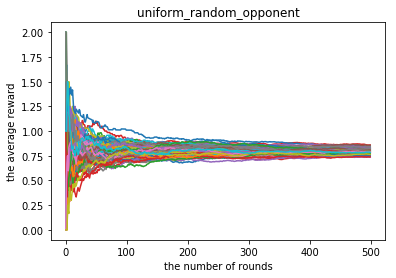

In [25]:
play_exp3(uniform_random_opponent)

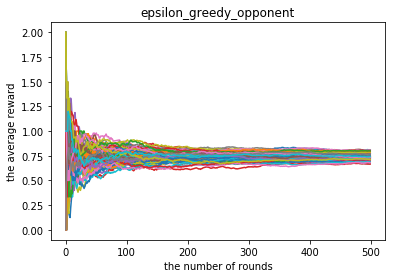

In [26]:
play_exp3(epsilon_greedy_opponent)

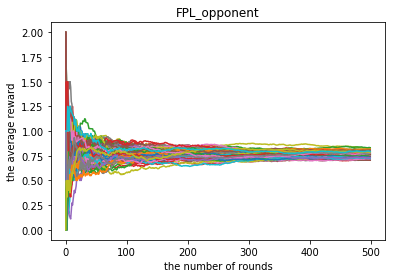

In [27]:
play_exp3(FPL_opponent)

In [292]:
def compute_expected_regret(opponent_policy):
    R = np.zeros(5)
    max_reward_for_one = 2
    expected_regret = []
    for i in range(500):
        if opponent_policy.__name__ in ['epsilon_greedy_opponent', 'FPL_opponent']:
            sites_reward = opponent_policy(R)
        else:
            sites_reward = opponent_policy()
        Z = np.random.exponential(scale=1, size=5)
        choices_index = np.argsort(R + Z)[-2:]
        rewards = sites_reward[choices_index]
        R[choices_index] += rewards
        expected_regret.append(((i + 1) * max_reward_for_one - sum(R)) / (i + 1))
    plt.plot(expected_regret)
    plt.title('Expected regret with ' + opponent_policy.__name__)

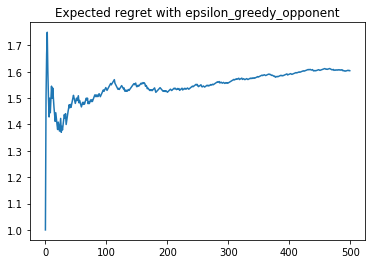

In [293]:
compute_expected_regret(epsilon_greedy_opponent)

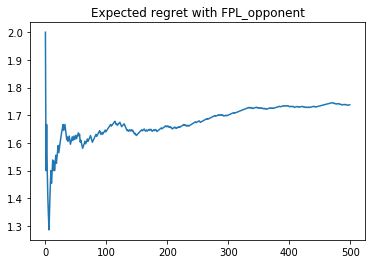

In [294]:
compute_expected_regret(FPL_opponent)

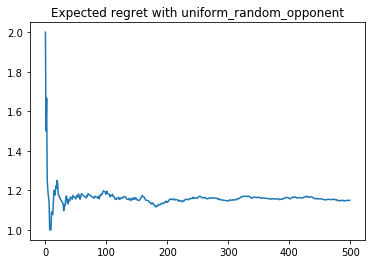

In [295]:
compute_expected_regret(uniform_random_opponent)